In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path='D:\data analysis\Kaggle\HomeCreditDefaultRisk\input' ##..表示py文件上一层的所有路径
print(os.listdir(path))

['.idea', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HCDF.ipynb', 'HCDF.py', 'HCDF2.ipynb', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
application_test = pd.read_csv(path+'\\'+'application_test.csv')
application_train = pd.read_csv(path+'\\'+'application_train.csv')
bureau = pd.read_csv(path+'\\'+'bureau.csv')
bureau_balance = pd.read_csv(path+'\\'+'bureau_balance.csv')
credit_card_balance = pd.read_csv(path+'\\'+'credit_card_balance.csv')
installments_payments = pd.read_csv(path+'\\'+'installments_payments.csv')
POS_CASH_balance = pd.read_csv(path+'\\'+'POS_CASH_balance.csv')
previous_application = pd.read_csv(path+'\\'+'previous_application.csv')
sample_submission = pd.read_csv(path+'\\'+'sample_submission.csv')

In [4]:
print('application_test -- row',application_test.shape[0],' columns',application_test.shape[1])
print('application_train -- row',application_train.shape[0],' columns',application_train.shape[1])
print("bureau -- rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_test -- row 48744  columns 121
application_train -- row 307511  columns 122
bureau -- rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


In [5]:
#application_test
print(application_train.head())
#application_train = pd.DataFrame(application_train)
print(application_train.columns.values)
#application_train
print(application_test.head())
print(application_test.columns.values)
#bureau
print(bureau.head())
print(bureau.columns.values)
#bureau_balance
print(bureau_balance.head())
print(bureau_balance.columns.values)
#credit_card_balance
print(credit_card_balance.head())
print(credit_card_balance.columns.values)
#installments_payments
print(installments_payments.head())
print(installments_payments.columns.values)
#previous_application
print(previous_application.head())
print(previous_application.columns.values)
#POS_CASH_balance
print(POS_CASH_balance.head())
print(POS_CASH_balance.columns.values)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

282686


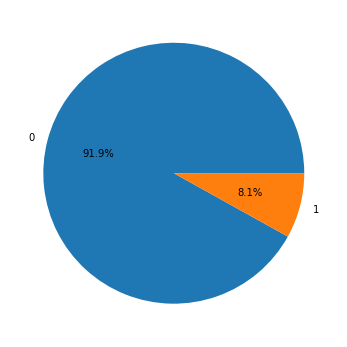

In [34]:
tmp = application_train['TARGET']
df = pd.DataFrame({'Label':tmp.index,
                       'Value':tmp.values})
a = df['Value'].value_counts()
print(a[0])

plt.figure(figsize=(6,6))
plt.title('Target Distribution')
plt.axes(aspect= 1)
label = [0,1]
b = [a[0],a[1]]
plt.pie(x=b,labels=label,autopct= '%3.1f%%')
plt.show()

In [37]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)##ascending 排序方式，默认为True是为降序，False 为升序
    ##sort_value 根据某一列的数值进行排序，NaN值会自动排在最后面
    percent = (data.isnull().sum() / data.isnull().count() *100).sort_values(ascending = False)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [40]:
missing_data(application_test).head(10)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
